In [ ]:
!pip install keras_core keras_nlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.1/644.1 kB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 108.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 78.8 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.0
    Uninstalling tensorboard-2.17.0:
      Successfully uninstalled tensorboard-2.17.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.0
    Uninstalling tensorflow-2.17.0:
      Successfully uninstalled tensorflow-2.17.0
ERROR: pip's dependency resolver

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import string
import csv
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
# import keras_core as keras
# import keras_nlp
# from tensorflow import keras

In [ ]:
def train_dev_jsonl_to_csv(jsonl_file, csv_file):
    csv_columns = ['id', 'essay', 'label']

    with open(csv_file, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()

        with open(jsonl_file, 'r', encoding='utf-8') as f:
            for line in f:
                data = json.loads(line)
                filtered_data = {key: data[key] for key in csv_columns}
                writer.writerow(filtered_data)


def test_jsonl_to_csv(jsonl_file, csv_file):
    csv_columns = ['id', 'essay']

    with open(csv_file, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()

        with open(jsonl_file, 'r', encoding='utf-8') as f:
            for line in f:
                data = json.loads(line)
                writer.writerow(data)

In [ ]:
arabic_train_jsonl_file = '/content/academic_essay_arabic_train.jsonl'
arabic_train_csv_file = 'arabic_train.csv'
train_dev_jsonl_to_csv(arabic_train_jsonl_file, arabic_train_csv_file)
print(f"Data successfully written to {arabic_train_csv_file}")

Data successfully written to arabic_train.csv


In [ ]:
arabic_dev_jsonl_file = '/content/academic_essay_arabic_dev.jsonl'
arabic_dev_csv_file = 'arabic_dev.csv'
train_dev_jsonl_to_csv(arabic_dev_jsonl_file, arabic_dev_csv_file)
print(f"Data successfully written to {arabic_dev_csv_file}")

Data successfully written to arabic_dev.csv


In [ ]:
arabic_test_jsonl_file = '/content/academic_essay_arabic_dev_test_no_label.jsonl'
arabic_test_csv_file = 'arabic_devtest.csv'
test_jsonl_to_csv(arabic_test_jsonl_file, arabic_test_csv_file)
print(f"Data successfully written to {arabic_test_csv_file}")

Data successfully written to arabic_devtest.csv


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Coling2025/arabic_train.csv')
train

,id,essay,label
0,4192b73413b7737c4d8880c98d095744434ad266b0eb0d...,الفقه الإسلامي هو مجال دراسي مثير للاهتمام وال...,ai
1,f5a19d304eb7a97b59288292b2491e28a94b4bb8d92bfb...,يوميات\nما فعلت في عطلتي:\nفي يوم الجمع لم أذه...,human
2,S555_T1_M_Pre_NAS_W_C,ذهبنا الى الحج في البيت الحرام والحج يتطلب تصر...,human
3,S055_T1_M_Pre_NAS_W_C,بسم الله الرحمن الرحيم والصلاة والسلام على نبي...,human
4,72245f89ccbe5d07d245064729d395a67c80eb46328215...,الهندسة البترولية: شغفي الدراسي\n\nالهندسة الب...,ai
...,...,...,...
2065,d6436890ad90d22c943f503b5b738b9886e1cdcf701102...,رحلة إلى ينبع\n\nفي إحدى الإجازات الصيفية، قرر...,ai
2066,3fff76859e37669c5a57c8a641b766b70d7c2fba663910...,رحلتي إلى الدمام\n\nكانت رحلتي إلى الدمام تجرب...,ai
2067,S103_T1_M_Pre_NNAS_W_C,كنتفي الغابة في الصين. وتاريخها (27/06/2013م) ...,human
2068,4fbd9baf552bfe2776d4dd56255eb802e707688780f93e...,السفر إلى أماكن جديدة يقدم إثراءً أكبر من البق...,ai


In [ ]:
dev = pd.read_csv('/content/drive/MyDrive/Coling2025/arabic_dev.csv')
dev

,id,essay,label
0,e5eb01ddf5d58e0b7f6b7f162c9ad034bd3e710336e716...,لا شك أن التسوق عبر الإنترنت قد أصبح ظاهرة عال...,ai
1,89d8114b6fcc21f24790b372b17718b2c57b994210d8e6...,أوافق. فمع التطور المتسارع الذي ظهر على عالمنا...,human
2,e5eb01ddf5d58e0b7f6b7f162c9ad034bd3e710336e716...,لا شك أن التسوق عبر الإنترنت قد أصبح ظاهرة عال...,ai
3,968a0500332a7479379f8513d785b532b747048aed05df...,وصل التطور التكنولوجي في عصرنا الحالي إلى قمة ...,human
4,8e1b5a85706f3f1976af69efea9656625a028a10aa1e99...,القراءة من الكتب المطبوعة تجربة أغنى من قراءة ...,ai
...,...,...,...
476,8f3df6fd54b4f726e06569bea95a1ebd4440601974309a...,التكنولوجيا الحديثة قد أثرت على البشر بصورة سل...,human
477,f2e7e5af57092305ec3738d1d0127962c92817d21b5e87...,## تأثير وسائل التواصل الاجتماعي: سلبيات تفوق ...,ai
478,ae3dcab7c41838815c004dca7a487d2917c2b2b46dd206...,إن امتلاك عدد قليل من الأصدقاء المقربين أكثر ق...,ai
479,a9dffc4880e088736864afa62428e4f90dcdd8260e4bd8...,التخطيط الدقيق لمستقبلك أكثر حكمة من العيش بشك...,ai


In [ ]:
train['label'] = train['label'].apply(lambda s: 0 if s == 'human' else 1)

In [ ]:
dev['label'] = dev['label'].apply(lambda s: 0 if s == 'human' else 1)

In [ ]:
train = train.drop(columns=['id'])

In [ ]:
dev = dev.drop(columns=['id'])

In [ ]:
train

,essay,label
0,الفقه الإسلامي هو مجال دراسي مثير للاهتمام وال...,1
1,يوميات\nما فعلت في عطلتي:\nفي يوم الجمع لم أذه...,0
2,ذهبنا الى الحج في البيت الحرام والحج يتطلب تصر...,0
3,بسم الله الرحمن الرحيم والصلاة والسلام على نبي...,0
4,الهندسة البترولية: شغفي الدراسي\n\nالهندسة الب...,1
...,...,...
2065,رحلة إلى ينبع\n\nفي إحدى الإجازات الصيفية، قرر...,1
2066,رحلتي إلى الدمام\n\nكانت رحلتي إلى الدمام تجرب...,1
2067,كنتفي الغابة في الصين. وتاريخها (27/06/2013م) ...,0
2068,السفر إلى أماكن جديدة يقدم إثراءً أكبر من البق...,1


In [ ]:
dev

,essay,label
0,لا شك أن التسوق عبر الإنترنت قد أصبح ظاهرة عال...,1
1,أوافق. فمع التطور المتسارع الذي ظهر على عالمنا...,0
2,لا شك أن التسوق عبر الإنترنت قد أصبح ظاهرة عال...,1
3,وصل التطور التكنولوجي في عصرنا الحالي إلى قمة ...,0
4,القراءة من الكتب المطبوعة تجربة أغنى من قراءة ...,1
...,...,...
476,التكنولوجيا الحديثة قد أثرت على البشر بصورة سل...,0
477,## تأثير وسائل التواصل الاجتماعي: سلبيات تفوق ...,1
478,إن امتلاك عدد قليل من الأصدقاء المقربين أكثر ق...,1
479,التخطيط الدقيق لمستقبلك أكثر حكمة من العيش بشك...,1


In [ ]:
train['text_length'] = train['essay'].apply(lambda x : len(x.split()))

Text(0.5, 0.98, 'Distribution of the length per essay - Train dataset')

<Figure size 4000x5000 with 0 Axes>

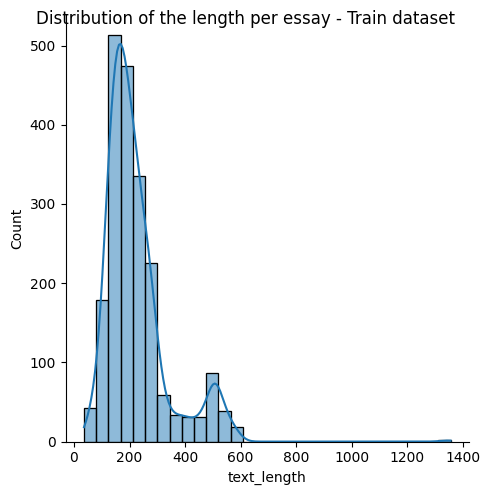

In [ ]:
fig = plt.figure(figsize=(40,50))
plot = sns.displot(data=train, x="text_length", bins=30, kde=True)
plot.fig.suptitle("Distribution of the length per essay - Train dataset")

In [ ]:
train["text_length"].mean(), train["text_length"].std()

(223.39323671497584, 114.25285463533011)

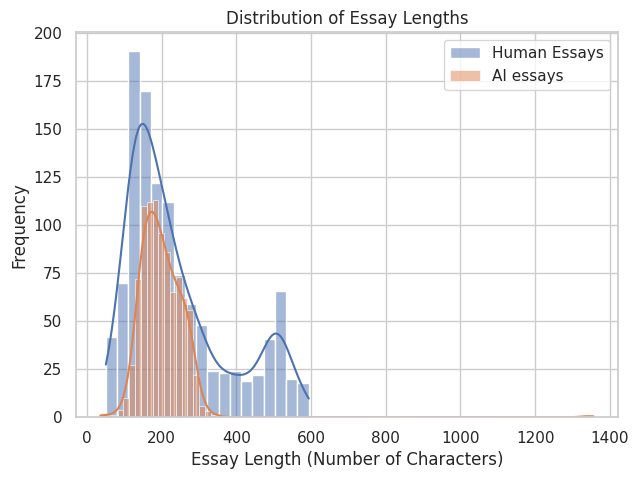

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(7, 5))

sns.histplot(data=train[train["label"] == 0]["text_length"], label = "Human Essays", kde = True)
sns.histplot(data=train[train["label"] == 1]["text_length"], label = "AI essays", kde = True)

plt.title('Distribution of Essay Lengths')
plt.xlabel('Essay Length (Number of Characters)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
def create_text_metrics(text):
    word_count = len(text.split())
    sentence_count = len(text.split('.'))
    unique_word_count = len(set(text.split()))
    return word_count, sentence_count, unique_word_count

train['metrics'] = train['essay'].apply( create_text_metrics)
train[['word_count', 'sentence_count', 'unique_word_count']] = pd.DataFrame(train['metrics'].tolist(), index = train.index)
train.drop('metrics', axis=1, inplace=True)

comparison_metrics = train.groupby('label')[['word_count',  'sentence_count', 'unique_word_count']].mean()
comparison_metrics

,word_count,sentence_count,unique_word_count
label,,,
0,241.512664,8.719651,169.542358
1,200.964324,14.331892,137.571892


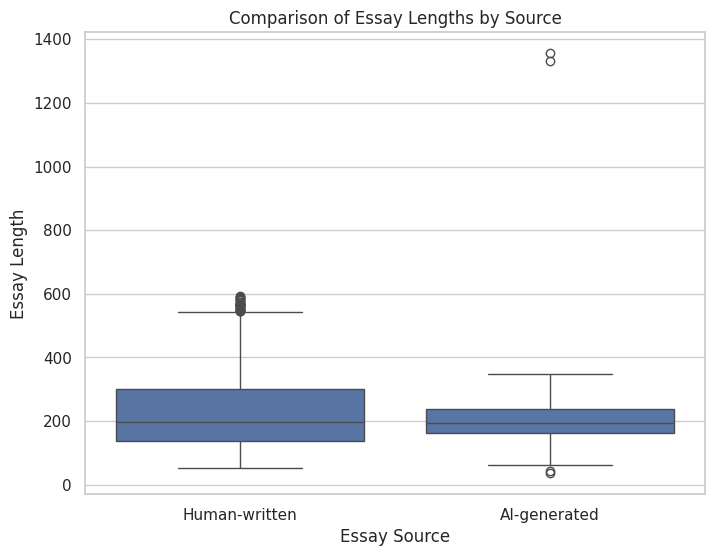

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='text_length', data=train)
plt.title('Comparison of Essay Lengths by Source')
plt.xlabel('Essay Source')
plt.ylabel('Essay Length')
plt.xticks([0, 1], ['Human-written', 'AI-generated'])
plt.show()

In [ ]:
train

,essay,label,text_length,word_count,sentence_count,unique_word_count
0,الفقه الإسلامي هو مجال دراسي مثير للاهتمام وال...,1,139,139,9,95
1,يوميات\nما فعلت في عطلتي:\nفي يوم الجمع لم أذه...,0,101,101,8,64
2,ذهبنا الى الحج في البيت الحرام والحج يتطلب تصر...,0,142,142,3,110
3,بسم الله الرحمن الرحيم والصلاة والسلام على نبي...,0,206,206,6,162
4,الهندسة البترولية: شغفي الدراسي\n\nالهندسة الب...,1,267,267,20,197
...,...,...,...,...,...,...
2065,رحلة إلى ينبع\n\nفي إحدى الإجازات الصيفية، قرر...,1,248,248,20,188
2066,رحلتي إلى الدمام\n\nكانت رحلتي إلى الدمام تجرب...,1,176,176,16,146
2067,كنتفي الغابة في الصين. وتاريخها (27/06/2013م) ...,0,160,160,19,126
2068,السفر إلى أماكن جديدة يقدم إثراءً أكبر من البق...,1,200,200,16,150


In [ ]:
import keras_nlp

print(keras_nlp.models.BertPreprocessor.presets.keys())

dict_keys(['bert_tiny_en_uncased', 'bert_small_en_uncased', 'bert_medium_en_uncased', 'bert_base_en_uncased', 'bert_base_en', 'bert_base_zh', 'bert_base_multi', 'bert_large_en_uncased', 'bert_large_en', 'bert_tiny_en_uncased_sst2'])


In [ ]:
import keras_nlp
import keras

# Set the sequence length
SEQ_LENGTH = 512

# Use the available preset for XLM-RoBERTa
preprocessor = keras_nlp.models.XLMRobertaPreprocessor.from_preset(
    "xlm_roberta_base_multi",  # Use the correct preset identifier
    sequence_length=SEQ_LENGTH,
)

# Pretrained classifier using the multi-language XLM-RoBERTa
classifier = keras_nlp.models.XLMRobertaClassifier.from_preset(
    "xlm_roberta_base_multi",  # Use the correct preset identifier
    num_classes=2,
    activation=None,
    preprocessor=preprocessor,
)

# Re-compile (e.g., with a new learning rate)
classifier.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(5e-4),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy()
    ]
)

# Access backbone programmatically (e.g., to change `trainable`).
classifier.backbone.trainable = False

# Print the model summary
classifier.summary()


100%|██████████| 517/517 [00:00<00:00, 436kB/s]


100%|██████████| 429/429 [00:00<00:00, 376kB/s]


100%|██████████| 4.83M/4.83M [00:00<00:00, 10.3MB/s]


100%|██████████| 1.03G/1.03G [00:19<00:00, 56.7MB/s]


Preprocessor: "xlm_roberta_text_classifier_preprocessor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                                  ┃                                   Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ xlm_roberta_tokenizer (XLMRobertaTokenizer)                   │                      Vocab size: 250,002 │
└───────────────────────────────────────────────────────────────┴──────────────────────────────────────────┘

Model: "xlm_roberta_text_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ xlm_roberta_backbone          │ (None, None, 768)         │     277,450,752 │ padding_mask[0][0],        │
│ (XLMRobertaBackbone)          │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item (GetItem)            │ (None, 768)               │               0 │ xlm_roberta_backbone[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dropout (Dropout)      │ (None, 768)               │               0 │ get_item[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dense (Dense)          │ (None, 768)               │         590,592 │ pooled_dropout[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_dropout (Dropout)      │ (None, 768)               │               0 │ pooled_dense[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │           1,538 │ output_dropout[0][0]       │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 278,042,882 (1.04 GB)

 Trainable params: 592,130 (2.26 MB)

 Non-trainable params: 277,450,752 (1.03 GB)

In [ ]:
X_train = train["essay"]
X_test = dev["essay"]
y_train = train["label"]
y_test = dev["label"]

In [ ]:
# Fit
classifier.fit(x=X_train,
               y=y_train,
               validation_data=(X_test, y_test),
               epochs=1,
               batch_size=64
              )

33/33 ━━━━━━━━━━━━━━━━━━━━ 159s 4s/step - loss: 0.6497 - sparse_categorical_accuracy: 0.6297 - val_loss: 0.6048 - val_sparse_categorical_accuracy: 0.9459


In [ ]:
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        np.argmax(y_pred, axis=1),
        display_labels=["Human","AI"],
        cmap=plt.cm.Blues
    )

    tn, fp, fn, tp = confusion_matrix(y_true, np.argmax(y_pred, axis=1)).ravel()
    f1_score = tp / (tp+((fn+fp)/2))

    disp.ax_.set_title("Confusion Matrix on " + dataset + " Dataset -- F1 Score: " + str(f1_score.round(2)))

In [ ]:
classifier.save("model_xlmroberta.keras")

In [ ]:
y_pred_test = classifier.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step


In [ ]:
y_pred_test

array([[-2.21115410e-01,  7.75354207e-02],
       [ 4.99985032e-02, -1.23602107e-01],
       [-2.23611251e-01,  8.68109316e-02],
       [ 5.02692424e-02, -1.26179054e-01],
       [-1.00975484e-01, -3.57958418e-03],
       [-7.52479285e-02, -1.64013188e-02],
       [ 4.47680689e-02, -1.28545478e-01],
       [-8.42736512e-02, -1.33595439e-02],
       [ 1.13591716e-01, -1.75025567e-01],
       [-1.16085365e-01, -1.91828352e-03],
       [-6.75841197e-02, -2.00071167e-02],
       [-1.55106425e-01,  4.02534045e-02],
       [-1.67305395e-01,  5.33274747e-02],
       [-1.58955649e-01,  4.53663655e-02],
       [-1.16935551e-01,  2.12587672e-03],
       [-5.70272394e-02, -3.79032455e-02],
       [ 1.14134699e-01, -1.83435842e-01],
       [-4.29094546e-02, -4.53216843e-02],
       [-9.31189582e-02, -2.16892106e-03],
       [-1.80862457e-01,  5.99486865e-02],
       [-3.23286690e-02, -5.55151664e-02],
       [-1.09285526e-01,  7.13281613e-03],
       [-9.87369046e-02, -1.33604975e-02],
       [ 3.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef

def alldisplayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        np.argmax(y_pred, axis=1),
        display_labels=["Human", "AI"],
        cmap=plt.cm.Blues
    )

    tn, fp, fn, tp = confusion_matrix(y_true, np.argmax(y_pred, axis=1)).ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if tp + fp > 0 else 0
    recall = tp / (tp + fn) if tp + fn > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0
    mcc = matthews_corrcoef(y_true, np.argmax(y_pred, axis=1))

    disp.ax_.set_title("Confusion Matrix on " + dataset + " Dataset -- F1 Score: " + str(round(f1, 2)))

    plt.show()

    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


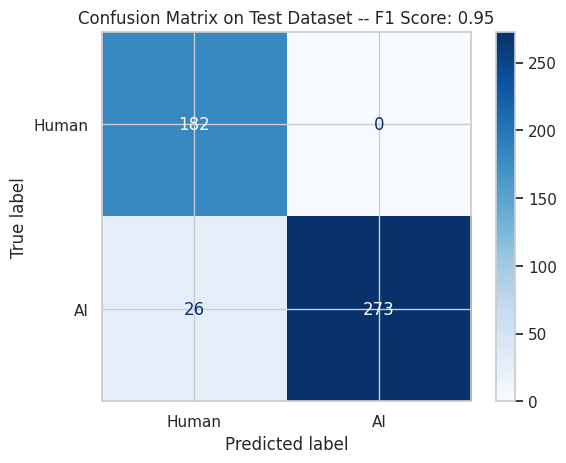

Accuracy: 0.9459
Precision: 1.0000
Recall: 0.9130
F1 Score: 0.9545
Matthews Correlation Coefficient (MCC): 0.8938


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
alldisplayConfusionMatrix(y_test, y_pred_test,  "Test")

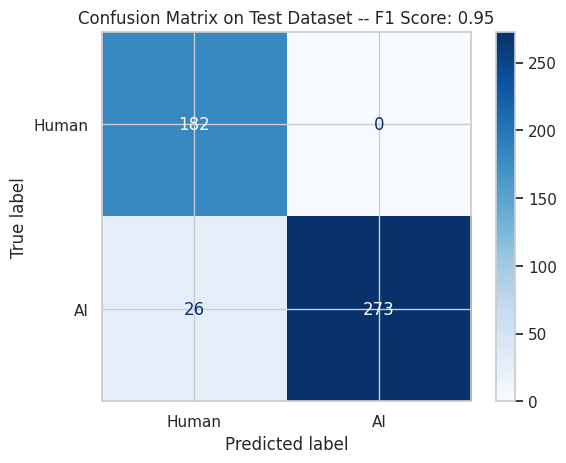

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
displayConfusionMatrix(y_test, y_pred_test,  "Test")

In [ ]:
train.query('label==0')['essay'].iloc[0]

'يوميات\nما فعلت في عطلتي:\nفي يوم الجمع لم أذهب الى الجامعة لان يجب ان اذهب الى "have tests run" "in order to" "hospital“ .\nو في يوم السبت هناك جيولوجيا "exhibit" وانا و بنت خالتي زرناه.\nوفي يوم الاحد ذهبت الى كنيسة و ثم الى الغدء في مطعم.\nو في يوم الانين حتى يوم الحامس ذهبت الى الجامعة و فعلت فقط.\nو في يوم الجمع الطقس هو برد وهناك ثلج كثيراً فلم يمكنني ان اذهب الى فعلى. درست و قرات نمت!\nو في ليلة السبت، انا وصديقتي شهادنا فلم جميل.\nو في يوم الاحد ذهبت الى كنيسة وثم انتهت الوجباتي.'

In [ ]:
test = pd.Series(['International sports events require the most well-trained athletes for each country, in order to achieve this goal countries make an effort to build infrastructure designed to train top athletes. Although this policy can indeed make fewer sports facilities for ordinary people, investing in the best athletes is vital to develop competitive sports performances in each country.On the one hand, building specific infrastructure for the best athletes is crucial in order to get better results at international sports events such as The Olympics or the World Cup. The importance of getting better results is that it creates awareness of the importance of sports in society and motivates more people to do a sport. In this way, investing in these developments can help countries to develop an integral sport policy that can benefit everyone.On the other hand, one can argue that a negative effect could be that less infrastructure is built for the rest of the people. However, people who practice a sport in their daily life do not necessarily need some facilities to do sports. For example, people often use public spaces to do sports such as running or doing yoga at the nearest park to their home. So, for people who is not top athletes there could be some alternatives for sports facility that ,is not the case for training top athletes.To sum up, I strongly believe countries should invest in specialised infrastructure for their best athletes because in the long term is going to generate more motivation to do sports, to invest in sports at schools and therefore to build more sports infrastructure for everyone.'])

In [ ]:
y_new_pred = classifier.predict(test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 674ms/step


In [ ]:
np.argmax(y_new_pred, axis=1)

array([0])

In [ ]:
devtest = pd.read_csv('/content/drive/MyDrive/Coling2025/arabic_devtest.csv')
devtest

,id,essay
0,10cbf6b3198c7aeeab7b99da49d72a63ce40f21fb203cf...,انا اعتقد أن الحكومة الامريكة من الازم أنْ تعم...
1,599fd6317e7f6bee18d0c80de1bf4eede41359bbdfdb13...,اجيبوا عن الأسئلة التالية (20) نقاط)\n1. ما هو...
2,c0158966ffe1dcdcee8e136593859e7120ee8d4573e393...,حضرت محاضرة ممتعة يوم الأربعاء الماضي في قاعة ...
3,da8054c54e7b96a459e0e4fd284c69de10dbbd551844c9...,"حوار عن ""الشرعية الدولية""\nفي البرنامج ""الاتجا..."
4,2bb987d1b0e46af118d5256c336a93fc69fa0959efdcee...,أنا أتمنى أن أصف لكم مظهر صديقي الذي أتمنى أن ...
...,...,...
881,29850e92a2e18c7d8e1ecaeb18a3767212dc3feb04cba8...,تطوعت مؤخرًا مع منظمة خيرية تعمل في مجال تعليم...
882,29850e92a2e18c7d8e1ecaeb18a3767212dc3feb04cba8...,"كانت تجربتي مع منظمة ""أمل للتنمية"" واحدة من أك..."
883,5eb13543a9eef4ac548941a53cb68607fe29c3d4da293c...,قارئة الفنجان في عَزيز\nتتأمَّل فِنجاني المقْل...
884,ba9bb81b64cdae3fabd43ec9e6e6e5b92b4c3e62451b7f...,أعتقد أن الامن والاستقرار للشعب العراقي\nسيحقق...


In [ ]:
devtest_new = devtest["essay"]
devtest_new

,essay
0,انا اعتقد أن الحكومة الامريكة من الازم أنْ تعم...
1,اجيبوا عن الأسئلة التالية (20) نقاط)\n1. ما هو...
2,حضرت محاضرة ممتعة يوم الأربعاء الماضي في قاعة ...
3,"حوار عن ""الشرعية الدولية""\nفي البرنامج ""الاتجا..."
4,أنا أتمنى أن أصف لكم مظهر صديقي الذي أتمنى أن ...
...,...
881,تطوعت مؤخرًا مع منظمة خيرية تعمل في مجال تعليم...
882,"كانت تجربتي مع منظمة ""أمل للتنمية"" واحدة من أك..."
883,قارئة الفنجان في عَزيز\nتتأمَّل فِنجاني المقْل...
884,أعتقد أن الامن والاستقرار للشعب العراقي\nسيحقق...


In [ ]:
devtest_pred = classifier.predict(devtest_new)

28/28 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step


In [ ]:
probabilities = tf.nn.softmax(devtest_pred).numpy()
probabilities

array([[0.6609011 , 0.3390989 ],
       [0.64831156, 0.3516884 ],
       [0.4602247 , 0.5397753 ],
       ...,
       [0.5693608 , 0.43063924],
       [0.6486416 , 0.3513584 ],
       [0.45954877, 0.5404512 ]], dtype=float32)

In [ ]:
predicted_classes = np.argmax(probabilities, axis=1)
predicted_classes

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,

In [ ]:
devtest['predictions'] = predicted_classes
devtest

,id,essay,predictions
0,10cbf6b3198c7aeeab7b99da49d72a63ce40f21fb203cf...,انا اعتقد أن الحكومة الامريكة من الازم أنْ تعم...,0
1,599fd6317e7f6bee18d0c80de1bf4eede41359bbdfdb13...,اجيبوا عن الأسئلة التالية (20) نقاط)\n1. ما هو...,0
2,c0158966ffe1dcdcee8e136593859e7120ee8d4573e393...,حضرت محاضرة ممتعة يوم الأربعاء الماضي في قاعة ...,1
3,da8054c54e7b96a459e0e4fd284c69de10dbbd551844c9...,"حوار عن ""الشرعية الدولية""\nفي البرنامج ""الاتجا...",0
4,2bb987d1b0e46af118d5256c336a93fc69fa0959efdcee...,أنا أتمنى أن أصف لكم مظهر صديقي الذي أتمنى أن ...,0
...,...,...,...
881,29850e92a2e18c7d8e1ecaeb18a3767212dc3feb04cba8...,تطوعت مؤخرًا مع منظمة خيرية تعمل في مجال تعليم...,1
882,29850e92a2e18c7d8e1ecaeb18a3767212dc3feb04cba8...,"كانت تجربتي مع منظمة ""أمل للتنمية"" واحدة من أك...",1
883,5eb13543a9eef4ac548941a53cb68607fe29c3d4da293c...,قارئة الفنجان في عَزيز\nتتأمَّل فِنجاني المقْل...,0
884,ba9bb81b64cdae3fabd43ec9e6e6e5b92b4c3e62451b7f...,أعتقد أن الامن والاستقرار للشعب العراقي\nسيحقق...,0


In [ ]:
devtest_new = devtest[['id', 'predictions']]
devtest_new

,id,predictions
0,10cbf6b3198c7aeeab7b99da49d72a63ce40f21fb203cf...,0
1,599fd6317e7f6bee18d0c80de1bf4eede41359bbdfdb13...,0
2,c0158966ffe1dcdcee8e136593859e7120ee8d4573e393...,1
3,da8054c54e7b96a459e0e4fd284c69de10dbbd551844c9...,0
4,2bb987d1b0e46af118d5256c336a93fc69fa0959efdcee...,0
...,...,...
881,29850e92a2e18c7d8e1ecaeb18a3767212dc3feb04cba8...,1
882,29850e92a2e18c7d8e1ecaeb18a3767212dc3feb04cba8...,1
883,5eb13543a9eef4ac548941a53cb68607fe29c3d4da293c...,0
884,ba9bb81b64cdae3fabd43ec9e6e6e5b92b4c3e62451b7f...,0


In [ ]:
devtest_new['predictions'] = devtest_new['predictions'].astype(float)
devtest_new

<ipython-input-41-a9f66ad0e92e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devtest_new['predictions'] = devtest_new['predictions'].astype(float)


,id,predictions
0,10cbf6b3198c7aeeab7b99da49d72a63ce40f21fb203cf...,0.0
1,599fd6317e7f6bee18d0c80de1bf4eede41359bbdfdb13...,0.0
2,c0158966ffe1dcdcee8e136593859e7120ee8d4573e393...,1.0
3,da8054c54e7b96a459e0e4fd284c69de10dbbd551844c9...,0.0
4,2bb987d1b0e46af118d5256c336a93fc69fa0959efdcee...,0.0
...,...,...
881,29850e92a2e18c7d8e1ecaeb18a3767212dc3feb04cba8...,1.0
882,29850e92a2e18c7d8e1ecaeb18a3767212dc3feb04cba8...,1.0
883,5eb13543a9eef4ac548941a53cb68607fe29c3d4da293c...,0.0
884,ba9bb81b64cdae3fabd43ec9e6e6e5b92b4c3e62451b7f...,0.0


In [ ]:
devtest_new['predictions'] = devtest_new['predictions'].apply(lambda s: 'human' if s == 0.0 else 'ai')
devtest_new

<ipython-input-42-cefed2b6ed5e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devtest_new['predictions'] = devtest_new['predictions'].apply(lambda s: 'human' if s == 0.0 else 'ai')


,id,predictions
0,10cbf6b3198c7aeeab7b99da49d72a63ce40f21fb203cf...,human
1,599fd6317e7f6bee18d0c80de1bf4eede41359bbdfdb13...,human
2,c0158966ffe1dcdcee8e136593859e7120ee8d4573e393...,ai
3,da8054c54e7b96a459e0e4fd284c69de10dbbd551844c9...,human
4,2bb987d1b0e46af118d5256c336a93fc69fa0959efdcee...,human
...,...,...
881,29850e92a2e18c7d8e1ecaeb18a3767212dc3feb04cba8...,ai
882,29850e92a2e18c7d8e1ecaeb18a3767212dc3feb04cba8...,ai
883,5eb13543a9eef4ac548941a53cb68607fe29c3d4da293c...,human
884,ba9bb81b64cdae3fabd43ec9e6e6e5b92b4c3e62451b7f...,human


In [ ]:
devtest_new.rename(columns={'predictions': 'label'}, inplace=True)
devtest_new

<ipython-input-43-809acb62c9a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  devtest_new.rename(columns={'predictions': 'label'}, inplace=True)


,id,label
0,10cbf6b3198c7aeeab7b99da49d72a63ce40f21fb203cf...,human
1,599fd6317e7f6bee18d0c80de1bf4eede41359bbdfdb13...,human
2,c0158966ffe1dcdcee8e136593859e7120ee8d4573e393...,ai
3,da8054c54e7b96a459e0e4fd284c69de10dbbd551844c9...,human
4,2bb987d1b0e46af118d5256c336a93fc69fa0959efdcee...,human
...,...,...
881,29850e92a2e18c7d8e1ecaeb18a3767212dc3feb04cba8...,ai
882,29850e92a2e18c7d8e1ecaeb18a3767212dc3feb04cba8...,ai
883,5eb13543a9eef4ac548941a53cb68607fe29c3d4da293c...,human
884,ba9bb81b64cdae3fabd43ec9e6e6e5b92b4c3e62451b7f...,human


In [ ]:
devtest_new.to_csv('devtest_new.tsv', sep='\t', index=False)

In [ ]:
X_train = train["essay"]
X_test = dev["essay"]
y_train = train["label"]
y_test = dev["label"]

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef
import numpy as np

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-multilingual-cased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-multilingual-cased', num_labels=2).to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/542M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Define TextDataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Prepare datasets and data loaders
train_dataset = TextDataset(train["essay"], train['label'], tokenizer, max_len=128)
dev_dataset = TextDataset(dev['essay'], dev['label'], tokenizer, max_len=128)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
dev_loader = DataLoader(dev_dataset, batch_size=16)

In [ ]:
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training and Validation Loop
epochs = 3
for epoch in range(epochs):
    # Training Phase
    model.train()
    train_loss, correct_train, total_train = 0, 0, 0
    all_train_preds, all_train_labels = [], []

    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, preds = torch.max(outputs.logits, 1)
        correct_train += (preds == labels).sum().item()
        total_train += labels.size(0)
        all_train_preds.extend(preds.cpu().numpy())
        all_train_labels.extend(labels.cpu().numpy())

    # Calculate metrics for training
    train_accuracy = correct_train / total_train
    train_precision = precision_score(all_train_labels, all_train_preds, average='weighted')
    train_recall = recall_score(all_train_labels, all_train_preds, average='weighted')
    train_f1 = f1_score(all_train_labels, all_train_preds, average='weighted')
    train_mcc = matthews_corrcoef(all_train_labels, all_train_preds)

    # Validation Phase
    model.eval()
    val_loss, correct_val, total_val = 0, 0, 0
    all_val_preds, all_val_labels = [], []

    with torch.no_grad():
        for batch in dev_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

            val_loss += loss.item()
            _, preds = torch.max(outputs.logits, 1)
            correct_val += (preds == labels).sum().item()
            total_val += labels.size(0)
            all_val_preds.extend(preds.cpu().numpy())
            all_val_labels.extend(labels.cpu().numpy())

    # Calculate metrics for validation
    val_accuracy = correct_val / total_val
    val_precision = precision_score(all_val_labels, all_val_preds, average='weighted')
    val_recall = recall_score(all_val_labels, all_val_preds, average='weighted')
    val_f1 = f1_score(all_val_labels, all_val_preds, average='weighted')
    val_mcc = matthews_corrcoef(all_val_labels, all_val_preds)

    # Print Metrics
    print(f"Epoch {epoch + 1}:")
    print(f"  Train -> Loss: {train_loss / len(train_loader):.4f}, Acc: {train_accuracy:.4f}, Prec: {train_precision:.4f}, Rec: {train_recall:.4f}, F1: {train_f1:.4f}, MCC: {train_mcc:.4f}")
    print(f"  Val   -> Loss: {val_loss / len(dev_loader):.4f}, Acc: {val_accuracy:.4f}, Prec: {val_precision:.4f}, Rec: {val_recall:.4f}, F1: {val_f1:.4f}, MCC: {val_mcc:.4f}")

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1:
  Train -> Loss: 0.2714, Acc: 0.9039, Prec: 0.9040, Rec: 0.9039, F1: 0.9039, MCC: 0.8057
  Val   -> Loss: 0.3457, Acc: 0.8628, Prec: 0.8876, Rec: 0.8628, F1: 0.8544, MCC: 0.7226
Epoch 2:
  Train -> Loss: 0.0623, Acc: 0.9807, Prec: 0.9807, Rec: 0.9807, F1: 0.9807, MCC: 0.9610
  Val   -> Loss: 0.1191, Acc: 0.9563, Prec: 0.9574, Rec: 0.9563, F1: 0.9565, MCC: 0.9088
Epoch 3:
  Train -> Loss: 0.0222, Acc: 0.9923, Prec: 0.9923, Rec: 0.9923, F1: 0.9923, MCC: 0.9844
  Val   -> Loss: 0.0653, Acc: 0.9709, Prec: 0.9709, Rec: 0.9709, F1: 0.9709, MCC: 0.9381


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1:
  Train -> Loss: 0.0255, Acc: 0.9923, Prec: 0.9923, Rec: 0.9923, F1: 0.9923, MCC: 0.9844
  Val   -> Loss: 0.0851, Acc: 0.9771, Prec: 0.9780, Rec: 0.9771, F1: 0.9772, MCC: 0.9526
Epoch 2:
  Train -> Loss: 0.0027, Acc: 0.9995, Prec: 0.9995, Rec: 0.9995, F1: 0.9995, MCC: 0.9990
  Val   -> Loss: 0.2620, Acc: 0.9480, Prec: 0.9543, Rec: 0.9480, F1: 0.9486, MCC: 0.8976
Epoch 3:
  Train -> Loss: 0.0003, Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000, MCC: 1.0000
  Val   -> Loss: 0.2679, Acc: 0.9563, Prec: 0.9609, Rec: 0.9563, F1: 0.9567, MCC: 0.9130

Overall Metrics:
Train -> Acc: 0.9973, Prec: 0.9973, Rec: 0.9973, F1: 0.9973, MCC: 0.9945
Val   -> Acc: 0.9605, Prec: 0.9644, Rec: 0.9605, F1: 0.9608, MCC: 0.9211


<Figure size 1000x800 with 0 Axes>

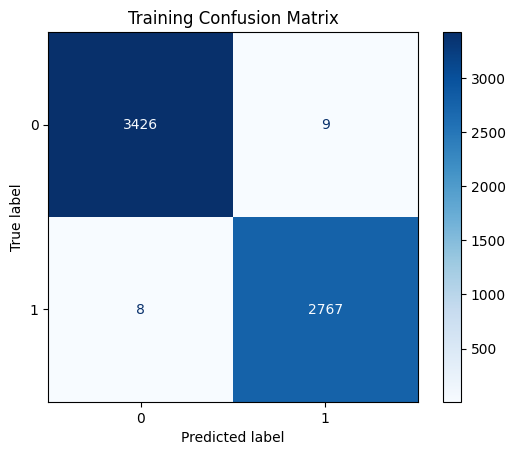

<Figure size 1000x800 with 0 Axes>

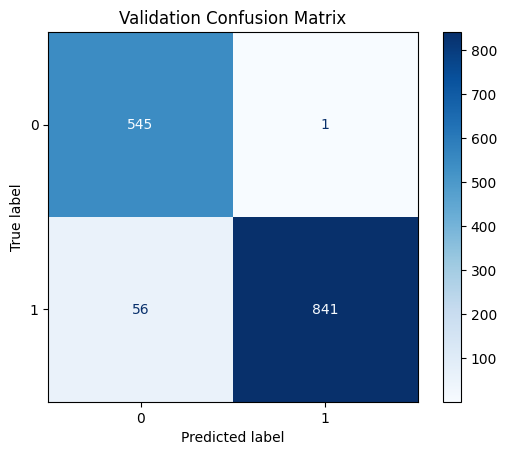

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training and Validation Loop
epochs = 3

# Initialize lists to store overall metrics
train_accuracies = []
train_precisions = []
train_recalls = []
train_f1_scores = []
train_mccs = []

val_accuracies = []
val_precisions = []
val_recalls = []
val_f1_scores = []
val_mccs = []

# Initialize lists to store all predictions and labels for confusion matrices
all_train_preds_final = []
all_train_labels_final = []
all_val_preds_final = []
all_val_labels_final = []

for epoch in range(epochs):
    # Training Phase
    model.train()
    train_loss, correct_train, total_train = 0, 0, 0
    all_train_preds, all_train_labels = [], []

    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, preds = torch.max(outputs.logits, 1)
        correct_train += (preds == labels).sum().item()
        total_train += labels.size(0)
        all_train_preds.extend(preds.cpu().numpy())
        all_train_labels.extend(labels.cpu().numpy())

    # Calculate metrics for training
    train_accuracy = correct_train / total_train
    train_precision = precision_score(all_train_labels, all_train_preds, average='weighted')
    train_recall = recall_score(all_train_labels, all_train_preds, average='weighted')
    train_f1 = f1_score(all_train_labels, all_train_preds, average='weighted')
    train_mcc = matthews_corrcoef(all_train_labels, all_train_preds)

    # Append training metrics to the lists
    train_accuracies.append(train_accuracy)
    train_precisions.append(train_precision)
    train_recalls.append(train_recall)
    train_f1_scores.append(train_f1)
    train_mccs.append(train_mcc)

    # Store predictions for confusion matrix
    all_train_preds_final.extend(all_train_preds)
    all_train_labels_final.extend(all_train_labels)

    # Validation Phase
    model.eval()
    val_loss, correct_val, total_val = 0, 0, 0
    all_val_preds, all_val_labels = [], []

    with torch.no_grad():
        for batch in dev_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

            val_loss += loss.item()
            _, preds = torch.max(outputs.logits, 1)
            correct_val += (preds == labels).sum().item()
            total_val += labels.size(0)
            all_val_preds.extend(preds.cpu().numpy())
            all_val_labels.extend(labels.cpu().numpy())

    # Calculate metrics for validation
    val_accuracy = correct_val / total_val
    val_precision = precision_score(all_val_labels, all_val_preds, average='weighted')
    val_recall = recall_score(all_val_labels, all_val_preds, average='weighted')
    val_f1 = f1_score(all_val_labels, all_val_preds, average='weighted')
    val_mcc = matthews_corrcoef(all_val_labels, all_val_preds)

    # Append validation metrics to the lists
    val_accuracies.append(val_accuracy)
    val_precisions.append(val_precision)
    val_recalls.append(val_recall)
    val_f1_scores.append(val_f1)
    val_mccs.append(val_mcc)

    # Store predictions for confusion matrix
    all_val_preds_final.extend(all_val_preds)
    all_val_labels_final.extend(all_val_labels)

    # Print Metrics for the current epoch
    print(f"Epoch {epoch + 1}:")
    print(f"  Train -> Loss: {train_loss / len(train_loader):.4f}, Acc: {train_accuracy:.4f}, Prec: {train_precision:.4f}, Rec: {train_recall:.4f}, F1: {train_f1:.4f}, MCC: {train_mcc:.4f}")
    print(f"  Val   -> Loss: {val_loss / len(dev_loader):.4f}, Acc: {val_accuracy:.4f}, Prec: {val_precision:.4f}, Rec: {val_recall:.4f}, F1: {val_f1:.4f}, MCC: {val_mcc:.4f}")

# Calculate and print overall metrics
overall_train_accuracy = sum(train_accuracies) / len(train_accuracies)
overall_train_precision = sum(train_precisions) / len(train_precisions)
overall_train_recall = sum(train_recalls) / len(train_recalls)
overall_train_f1 = sum(train_f1_scores) / len(train_f1_scores)
overall_train_mcc = sum(train_mccs) / len(train_mccs)

overall_val_accuracy = sum(val_accuracies) / len(val_accuracies)
overall_val_precision = sum(val_precisions) / len(val_precisions)
overall_val_recall = sum(val_recalls) / len(val_recalls)
overall_val_f1 = sum(val_f1_scores) / len(val_f1_scores)
overall_val_mcc = sum(val_mccs) / len(val_mccs)

# Print overall metrics
print("\nOverall Metrics:")
print(f"Train -> Acc: {overall_train_accuracy:.4f}, Prec: {overall_train_precision:.4f}, Rec: {overall_train_recall:.4f}, F1: {overall_train_f1:.4f}, MCC: {overall_train_mcc:.4f}")
print(f"Val   -> Acc: {overall_val_accuracy:.4f}, Prec: {overall_val_precision:.4f}, Rec: {overall_val_recall:.4f}, F1: {overall_val_f1:.4f}, MCC: {overall_val_mcc:.4f}")

# Compute confusion matrices
train_confusion = confusion_matrix(all_train_labels_final, all_train_preds_final)
val_confusion = confusion_matrix(all_val_labels_final, all_val_preds_final)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(10, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Assuming you have a list of class names
class_names = [str(i) for i in range(len(set(all_train_labels_final)))]

# Plot confusion matrices
plot_confusion_matrix(train_confusion, class_names, title='Training Confusion Matrix')
plot_confusion_matrix(val_confusion, class_names, title='Validation Confusion Matrix')


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1:
  Train -> Loss: 0.0208, Acc: 0.9937, Prec: 0.9937, Rec: 0.9937, F1: 0.9937, MCC: 0.9873
  Val   -> Loss: 0.3228, Acc: 0.8940, Prec: 0.9172, Rec: 0.8940, F1: 0.8955, MCC: 0.8049
Epoch 2:
  Train -> Loss: 0.0014, Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000, MCC: 1.0000
  Val   -> Loss: 0.2938, Acc: 0.9376, Prec: 0.9465, Rec: 0.9376, F1: 0.9384, MCC: 0.8788

Overall Metrics:
Train -> Acc: 0.9969, Prec: 0.9969, Rec: 0.9969, F1: 0.9969, MCC: 0.9937
Val   -> Acc: 0.9158, Prec: 0.9318, Rec: 0.9158, F1: 0.9170, MCC: 0.8419


<Figure size 1000x800 with 0 Axes>

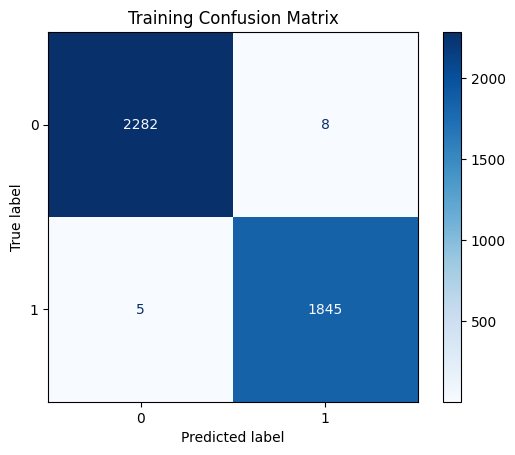

<Figure size 1000x800 with 0 Axes>

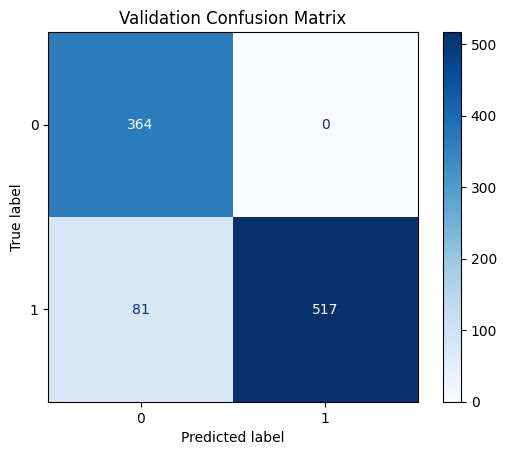

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training and Validation Loop
epochs = 2

# Initialize lists to store overall metrics
train_accuracies = []
train_precisions = []
train_recalls = []
train_f1_scores = []
train_mccs = []

val_accuracies = []
val_precisions = []
val_recalls = []
val_f1_scores = []
val_mccs = []

# Initialize lists to store all predictions and labels for confusion matrices
all_train_preds_final = []
all_train_labels_final = []
all_val_preds_final = []
all_val_labels_final = []

for epoch in range(epochs):
    # Training Phase
    model.train()
    train_loss, correct_train, total_train = 0, 0, 0
    all_train_preds, all_train_labels = [], []

    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, preds = torch.max(outputs.logits, 1)
        correct_train += (preds == labels).sum().item()
        total_train += labels.size(0)
        all_train_preds.extend(preds.cpu().numpy())
        all_train_labels.extend(labels.cpu().numpy())

    # Calculate metrics for training
    train_accuracy = correct_train / total_train
    train_precision = precision_score(all_train_labels, all_train_preds, average='weighted')
    train_recall = recall_score(all_train_labels, all_train_preds, average='weighted')
    train_f1 = f1_score(all_train_labels, all_train_preds, average='weighted')
    train_mcc = matthews_corrcoef(all_train_labels, all_train_preds)

    # Append training metrics to the lists
    train_accuracies.append(train_accuracy)
    train_precisions.append(train_precision)
    train_recalls.append(train_recall)
    train_f1_scores.append(train_f1)
    train_mccs.append(train_mcc)

    # Store predictions for confusion matrix
    all_train_preds_final.extend(all_train_preds)
    all_train_labels_final.extend(all_train_labels)

    # Validation Phase
    model.eval()
    val_loss, correct_val, total_val = 0, 0, 0
    all_val_preds, all_val_labels = [], []

    with torch.no_grad():
        for batch in dev_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

            val_loss += loss.item()
            _, preds = torch.max(outputs.logits, 1)
            correct_val += (preds == labels).sum().item()
            total_val += labels.size(0)
            all_val_preds.extend(preds.cpu().numpy())
            all_val_labels.extend(labels.cpu().numpy())

    # Calculate metrics for validation
    val_accuracy = correct_val / total_val
    val_precision = precision_score(all_val_labels, all_val_preds, average='weighted')
    val_recall = recall_score(all_val_labels, all_val_preds, average='weighted')
    val_f1 = f1_score(all_val_labels, all_val_preds, average='weighted')
    val_mcc = matthews_corrcoef(all_val_labels, all_val_preds)

    # Append validation metrics to the lists
    val_accuracies.append(val_accuracy)
    val_precisions.append(val_precision)
    val_recalls.append(val_recall)
    val_f1_scores.append(val_f1)
    val_mccs.append(val_mcc)

    # Store predictions for confusion matrix
    all_val_preds_final.extend(all_val_preds)
    all_val_labels_final.extend(all_val_labels)

    # Print Metrics for the current epoch
    print(f"Epoch {epoch + 1}:")
    print(f"  Train -> Loss: {train_loss / len(train_loader):.4f}, Acc: {train_accuracy:.4f}, Prec: {train_precision:.4f}, Rec: {train_recall:.4f}, F1: {train_f1:.4f}, MCC: {train_mcc:.4f}")
    print(f"  Val   -> Loss: {val_loss / len(dev_loader):.4f}, Acc: {val_accuracy:.4f}, Prec: {val_precision:.4f}, Rec: {val_recall:.4f}, F1: {val_f1:.4f}, MCC: {val_mcc:.4f}")

# Calculate and print overall metrics
overall_train_accuracy = sum(train_accuracies) / len(train_accuracies)
overall_train_precision = sum(train_precisions) / len(train_precisions)
overall_train_recall = sum(train_recalls) / len(train_recalls)
overall_train_f1 = sum(train_f1_scores) / len(train_f1_scores)
overall_train_mcc = sum(train_mccs) / len(train_mccs)

overall_val_accuracy = sum(val_accuracies) / len(val_accuracies)
overall_val_precision = sum(val_precisions) / len(val_precisions)
overall_val_recall = sum(val_recalls) / len(val_recalls)
overall_val_f1 = sum(val_f1_scores) / len(val_f1_scores)
overall_val_mcc = sum(val_mccs) / len(val_mccs)

# Print overall metrics
print("\nOverall Metrics:")
print(f"Train -> Acc: {overall_train_accuracy:.4f}, Prec: {overall_train_precision:.4f}, Rec: {overall_train_recall:.4f}, F1: {overall_train_f1:.4f}, MCC: {overall_train_mcc:.4f}")
print(f"Val   -> Acc: {overall_val_accuracy:.4f}, Prec: {overall_val_precision:.4f}, Rec: {overall_val_recall:.4f}, F1: {overall_val_f1:.4f}, MCC: {overall_val_mcc:.4f}")

# Compute confusion matrices
train_confusion = confusion_matrix(all_train_labels_final, all_train_preds_final)
val_confusion = confusion_matrix(all_val_labels_final, all_val_preds_final)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(10, 8))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(title)
    plt.show()

# Assuming you have a list of class names
class_names = [str(i) for i in range(len(set(all_train_labels_final)))]

# Plot confusion matrices
plot_confusion_matrix(train_confusion, class_names, title='Training Confusion Matrix')
plot_confusion_matrix(val_confusion, class_names, title='Validation Confusion Matrix')


In [ ]:
model_save_path = "Arabic_DistilBERT_model.pth"
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to Arabic_DistilBERT_model.pth


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Coling2025/arabic_devtest.csv')
data

,id,essay
0,10cbf6b3198c7aeeab7b99da49d72a63ce40f21fb203cf...,انا اعتقد أن الحكومة الامريكة من الازم أنْ تعم...
1,599fd6317e7f6bee18d0c80de1bf4eede41359bbdfdb13...,اجيبوا عن الأسئلة التالية (20) نقاط)\n1. ما هو...
2,c0158966ffe1dcdcee8e136593859e7120ee8d4573e393...,حضرت محاضرة ممتعة يوم الأربعاء الماضي في قاعة ...
3,da8054c54e7b96a459e0e4fd284c69de10dbbd551844c9...,"حوار عن ""الشرعية الدولية""\nفي البرنامج ""الاتجا..."
4,2bb987d1b0e46af118d5256c336a93fc69fa0959efdcee...,أنا أتمنى أن أصف لكم مظهر صديقي الذي أتمنى أن ...
...,...,...
881,29850e92a2e18c7d8e1ecaeb18a3767212dc3feb04cba8...,تطوعت مؤخرًا مع منظمة خيرية تعمل في مجال تعليم...
882,29850e92a2e18c7d8e1ecaeb18a3767212dc3feb04cba8...,"كانت تجربتي مع منظمة ""أمل للتنمية"" واحدة من أك..."
883,5eb13543a9eef4ac548941a53cb68607fe29c3d4da293c...,قارئة الفنجان في عَزيز\nتتأمَّل فِنجاني المقْل...
884,ba9bb81b64cdae3fabd43ec9e6e6e5b92b4c3e62451b7f...,أعتقد أن الامن والاستقرار للشعب العراقي\nسيحقق...


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)  # Move model to the correct device
model.eval()

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
texts = data["essay"].tolist()

def predict_texts(texts, model, tokenizer, max_len=128):
    predictions = []
    for text in texts:
        # Tokenize text
        encoding = tokenizer(
            text,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        # Move tensors to the correct device
        input_ids = encoding['input_ids'].to(device)
        attention_mask = encoding['attention_mask'].to(device)

        # Make prediction
        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, predicted_label = torch.max(outputs.logits, 1)
            predictions.append(predicted_label.item())

    return predictions

# Make predictions on the new dataset
predicted_labels = predict_texts(texts, model, tokenizer)

# Add predictions to the DataFrame and save it if needed
data['predicted_label'] = predicted_labels

In [ ]:
data

,id,essay,predicted_label
0,10cbf6b3198c7aeeab7b99da49d72a63ce40f21fb203cf...,انا اعتقد أن الحكومة الامريكة من الازم أنْ تعم...,0
1,599fd6317e7f6bee18d0c80de1bf4eede41359bbdfdb13...,اجيبوا عن الأسئلة التالية (20) نقاط)\n1. ما هو...,0
2,c0158966ffe1dcdcee8e136593859e7120ee8d4573e393...,حضرت محاضرة ممتعة يوم الأربعاء الماضي في قاعة ...,1
3,da8054c54e7b96a459e0e4fd284c69de10dbbd551844c9...,"حوار عن ""الشرعية الدولية""\nفي البرنامج ""الاتجا...",0
4,2bb987d1b0e46af118d5256c336a93fc69fa0959efdcee...,أنا أتمنى أن أصف لكم مظهر صديقي الذي أتمنى أن ...,0
...,...,...,...
881,29850e92a2e18c7d8e1ecaeb18a3767212dc3feb04cba8...,تطوعت مؤخرًا مع منظمة خيرية تعمل في مجال تعليم...,1
882,29850e92a2e18c7d8e1ecaeb18a3767212dc3feb04cba8...,"كانت تجربتي مع منظمة ""أمل للتنمية"" واحدة من أك...",1
883,5eb13543a9eef4ac548941a53cb68607fe29c3d4da293c...,قارئة الفنجان في عَزيز\nتتأمَّل فِنجاني المقْل...,0
884,ba9bb81b64cdae3fabd43ec9e6e6e5b92b4c3e62451b7f...,أعتقد أن الامن والاستقرار للشعب العراقي\nسيحقق...,0


In [ ]:
data = data.drop(columns='essay')
data

,id,predicted_label
0,10cbf6b3198c7aeeab7b99da49d72a63ce40f21fb203cf...,0
1,599fd6317e7f6bee18d0c80de1bf4eede41359bbdfdb13...,0
2,c0158966ffe1dcdcee8e136593859e7120ee8d4573e393...,1
3,da8054c54e7b96a459e0e4fd284c69de10dbbd551844c9...,0
4,2bb987d1b0e46af118d5256c336a93fc69fa0959efdcee...,0
...,...,...
881,29850e92a2e18c7d8e1ecaeb18a3767212dc3feb04cba8...,1
882,29850e92a2e18c7d8e1ecaeb18a3767212dc3feb04cba8...,1
883,5eb13543a9eef4ac548941a53cb68607fe29c3d4da293c...,0
884,ba9bb81b64cdae3fabd43ec9e6e6e5b92b4c3e62451b7f...,0


In [ ]:
data = data.rename(columns={'predicted_label': 'label'})
data

,id,label
0,10cbf6b3198c7aeeab7b99da49d72a63ce40f21fb203cf...,0
1,599fd6317e7f6bee18d0c80de1bf4eede41359bbdfdb13...,0
2,c0158966ffe1dcdcee8e136593859e7120ee8d4573e393...,1
3,da8054c54e7b96a459e0e4fd284c69de10dbbd551844c9...,0
4,2bb987d1b0e46af118d5256c336a93fc69fa0959efdcee...,0
...,...,...
881,29850e92a2e18c7d8e1ecaeb18a3767212dc3feb04cba8...,1
882,29850e92a2e18c7d8e1ecaeb18a3767212dc3feb04cba8...,1
883,5eb13543a9eef4ac548941a53cb68607fe29c3d4da293c...,0
884,ba9bb81b64cdae3fabd43ec9e6e6e5b92b4c3e62451b7f...,0


In [ ]:
data['label'] = data['label'].astype(float)
data

,id,label
0,10cbf6b3198c7aeeab7b99da49d72a63ce40f21fb203cf...,0.0
1,599fd6317e7f6bee18d0c80de1bf4eede41359bbdfdb13...,0.0
2,c0158966ffe1dcdcee8e136593859e7120ee8d4573e393...,1.0
3,da8054c54e7b96a459e0e4fd284c69de10dbbd551844c9...,0.0
4,2bb987d1b0e46af118d5256c336a93fc69fa0959efdcee...,0.0
...,...,...
881,29850e92a2e18c7d8e1ecaeb18a3767212dc3feb04cba8...,1.0
882,29850e92a2e18c7d8e1ecaeb18a3767212dc3feb04cba8...,1.0
883,5eb13543a9eef4ac548941a53cb68607fe29c3d4da293c...,0.0
884,ba9bb81b64cdae3fabd43ec9e6e6e5b92b4c3e62451b7f...,0.0


In [ ]:
data['label'] = data['label'].apply(lambda s: 'human' if s == 0.0 else 'ai')
data

,id,label
0,10cbf6b3198c7aeeab7b99da49d72a63ce40f21fb203cf...,human
1,599fd6317e7f6bee18d0c80de1bf4eede41359bbdfdb13...,human
2,c0158966ffe1dcdcee8e136593859e7120ee8d4573e393...,ai
3,da8054c54e7b96a459e0e4fd284c69de10dbbd551844c9...,human
4,2bb987d1b0e46af118d5256c336a93fc69fa0959efdcee...,human
...,...,...
881,29850e92a2e18c7d8e1ecaeb18a3767212dc3feb04cba8...,ai
882,29850e92a2e18c7d8e1ecaeb18a3767212dc3feb04cba8...,ai
883,5eb13543a9eef4ac548941a53cb68607fe29c3d4da293c...,human
884,ba9bb81b64cdae3fabd43ec9e6e6e5b92b4c3e62451b7f...,human


In [ ]:
data.to_csv('predictions.tsv', sep='\t', index=False)

In [ ]:
en_train = pd.read_csv('/content/drive/MyDrive/Coling2025/english_train.csv')
en_train

,id,essay,label
0,cc7727e8bfbc6e0051b71ceeeb928755def0f5e94b5168...,I disagree with the statement that the develop...,ai
1,fa7e1bc99ea20c78df905eb3780cb835bed078b64fce6a...,I disagree with the statement that the primary...,ai
2,d16ec17f6ffd059cf2eefe79ca2ccd9bdb78ea5ec2d6a0...,International sports events require the most w...,human
3,838f538cf1b0e03e51e423266844492af1a72874a224d4...,While some individuals may argue that working ...,ai
4,cd9fe478b001e04bcdc276f9675b90bc8c6332a7ea8abf...,I disagree with the statement that working rem...,ai
...,...,...,...
2091,1cf89b43ddf6f54c41ce5ff8d584dd47fbe21fc9007048...,Capital punishment is always associated with i...,human
2092,90aeae7d7df06d9e45cff4494973ad4cc668aa92f395b7...,Sport play an essential role in shaping the pe...,human
2093,a6ac8461fe6b71161372b63438d531af3168e3f4c5ce1c...,It is true that artificial activities cause te...,human
2094,a0bf652b04c7f6fdfea48ccabcc853aa21c832ce749257...,Packing of goods has become a noticeable issue...,human


In [ ]:
en_dev = pd.read_csv('/content/drive/MyDrive/Coling2025/english_dev.csv')
en_dev

,id,essay,label
0,f2c01bb1c6a76d96032879f999c94b0a6f85c7dc811789...,When faced to the questions that successful pe...,human
1,daece00c9d1a2fac77d9691df68b3c4537ac1e08569ddf...,"To start with , nowadays theres alot for peopl...",human
2,e3518500503fecb0e4993323f5b265d0ab386bd95ea2d5...,Successful people try new things because...,human
3,5796a76d2e4dcf027f3dbab6ca0fbd99c92b1a8be00645...,The path to success is rarely paved with famil...,ai
4,5d7d0983750bd528407aba6e2fa8731d66b6a58bf9d920...,The pursuit of success often involves venturin...,ai
...,...,...,...
1621,2184a4025f920c763b0a85b86aa28e0a2ea495edde9063...,I assume that people who are willing to try ne...,human
1622,d7ee816fd4f1d6c8b78f859f7d514de840fdd969d65470...,"To success in this life, we have to do all wh...",human
1623,09d8090cd31ac54cb83b5b1f6eff9237ebdb12ce76029e...,I'm not sure about the real meaning of the wor...,human
1624,0b0ebaa2b7d350654024fd53b6c2ba2bc345e384f4e989...,Eessential way to succeed is trying new things...,human


In [ ]:
en_train['label'] = en_train['label'].apply(lambda s: 0 if s == 'human' else 1)
en_train

,id,essay,label
0,cc7727e8bfbc6e0051b71ceeeb928755def0f5e94b5168...,I disagree with the statement that the develop...,1
1,fa7e1bc99ea20c78df905eb3780cb835bed078b64fce6a...,I disagree with the statement that the primary...,1
2,d16ec17f6ffd059cf2eefe79ca2ccd9bdb78ea5ec2d6a0...,International sports events require the most w...,0
3,838f538cf1b0e03e51e423266844492af1a72874a224d4...,While some individuals may argue that working ...,1
4,cd9fe478b001e04bcdc276f9675b90bc8c6332a7ea8abf...,I disagree with the statement that working rem...,1
...,...,...,...
2091,1cf89b43ddf6f54c41ce5ff8d584dd47fbe21fc9007048...,Capital punishment is always associated with i...,0
2092,90aeae7d7df06d9e45cff4494973ad4cc668aa92f395b7...,Sport play an essential role in shaping the pe...,0
2093,a6ac8461fe6b71161372b63438d531af3168e3f4c5ce1c...,It is true that artificial activities cause te...,0
2094,a0bf652b04c7f6fdfea48ccabcc853aa21c832ce749257...,Packing of goods has become a noticeable issue...,0


In [ ]:
en_dev['label'] = en_dev['label'].apply(lambda s: 0 if s == 'human' else 1)
en_dev

,id,essay,label
0,f2c01bb1c6a76d96032879f999c94b0a6f85c7dc811789...,When faced to the questions that successful pe...,0
1,daece00c9d1a2fac77d9691df68b3c4537ac1e08569ddf...,"To start with , nowadays theres alot for peopl...",0
2,e3518500503fecb0e4993323f5b265d0ab386bd95ea2d5...,Successful people try new things because...,0
3,5796a76d2e4dcf027f3dbab6ca0fbd99c92b1a8be00645...,The path to success is rarely paved with famil...,1
4,5d7d0983750bd528407aba6e2fa8731d66b6a58bf9d920...,The pursuit of success often involves venturin...,1
...,...,...,...
1621,2184a4025f920c763b0a85b86aa28e0a2ea495edde9063...,I assume that people who are willing to try ne...,0
1622,d7ee816fd4f1d6c8b78f859f7d514de840fdd969d65470...,"To success in this life, we have to do all wh...",0
1623,09d8090cd31ac54cb83b5b1f6eff9237ebdb12ce76029e...,I'm not sure about the real meaning of the wor...,0
1624,0b0ebaa2b7d350654024fd53b6c2ba2bc345e384f4e989...,Eessential way to succeed is trying new things...,0


In [ ]:
en_train = en_train.drop(columns=['id'])
en_dev = en_dev.drop(columns=['id'])

In [ ]:
en_train['label'] = en_train['label'].astype(int)
en_dev['label'] = en_dev['label'].astype(int)

In [ ]:
import pandas as pd
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import precision_score, recall_score, f1_score
import torch.nn as nn
from torch.optim import AdamW

In [ ]:
texts = 'essay'
labels = 'label'

In [ ]:
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, AdamW
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef

# Define the TextDataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            text,
            max_length=self.max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(0),
            'attention_mask': encoding['attention_mask'].squeeze(0),
            'label': torch.tensor(label, dtype=torch.long)
        }


tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
train_dataset = TextDataset(en_train['essay'], en_train['label'], tokenizer, max_len=128)
dev_dataset = TextDataset(en_dev['essay'], en_dev['label'], tokenizer, max_len=128)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
print("Training labels:", en_train['label'].unique())
print("Validation labels:", en_dev['label'].unique())

Training labels: [1 0]
Validation labels: [0 1]


In [ ]:
en_train['label'] = en_train['label'].clip(lower=0, upper=1)
en_dev['label'] = en_dev['label'].clip(lower=0, upper=1)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
dev_loader = DataLoader(dev_dataset, batch_size=16)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2).to(device)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)  # Move model to the correct device
model.eval()

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training and Validation Loop
epochs = 1
for epoch in range(epochs):
    # Training Phase
    model.train()
    train_loss, correct_train, total_train = 0, 0, 0
    all_train_preds, all_train_labels = [], []

    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss

        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, preds = torch.max(outputs.logits, 1)
        correct_train += (preds == labels).sum().item()
        total_train += labels.size(0)
        all_train_preds.extend(preds.cpu().numpy())
        all_train_labels.extend(labels.cpu().numpy())

    # Calculate metrics for training
    train_accuracy = correct_train / total_train
    train_precision = precision_score(all_train_labels, all_train_preds, average='weighted')
    train_recall = recall_score(all_train_labels, all_train_preds, average='weighted')
    train_f1 = f1_score(all_train_labels, all_train_preds, average='weighted')
    train_mcc = matthews_corrcoef(all_train_labels, all_train_preds)

    # Validation Phase
    model.eval()
    val_loss, correct_val, total_val = 0, 0, 0
    all_val_preds, all_val_labels = [], []

    with torch.no_grad():
        for batch in dev_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

            val_loss += loss.item()
            _, preds = torch.max(outputs.logits, 1)
            correct_val += (preds == labels).sum().item()
            total_val += labels.size(0)
            all_val_preds.extend(preds.cpu().numpy())
            all_val_labels.extend(labels.cpu().numpy())

    # Calculate metrics for validation
    val_accuracy = correct_val / total_val
    val_precision = precision_score(all_val_labels, all_val_preds, average='weighted')
    val_recall = recall_score(all_val_labels, all_val_preds, average='weighted')
    val_f1 = f1_score(all_val_labels, all_val_preds, average='weighted')
    val_mcc = matthews_corrcoef(all_val_labels, all_val_preds)

    # Print Metrics
    print(f"Epoch {epoch + 1}:")
    print(f"  Train -> Loss: {train_loss / len(train_loader):.4f}, Acc: {train_accuracy:.4f}, Prec: {train_precision:.4f}, Rec: {train_recall:.4f}, F1: {train_f1:.4f}, MCC: {train_mcc:.4f}")
    print(f"  Val   -> Loss: {val_loss / len(dev_loader):.4f}, Acc: {val_accuracy:.4f}, Prec: {val_precision:.4f}, Rec: {val_recall:.4f}, F1: {val_f1:.4f}, MCC: {val_mcc:.4f}")

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1:
  Train -> Loss: 0.0002, Acc: 1.0000, Prec: 1.0000, Rec: 1.0000, F1: 1.0000, MCC: 1.0000
  Val   -> Loss: 0.2352, Acc: 0.9539, Prec: 0.9563, Rec: 0.9539, F1: 0.9522, MCC: 0.8727


In [ ]:
model_save_path = "English_DistilBERT_model_uncased.pth"
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Model saved to English_DistilBERT_model_uncased.pth


In [ ]:
en_data = pd.read_csv('/content/drive/MyDrive/Coling2025/english_devtest.csv')
en_data

,id,essay
0,abab7ec20320a84b1c1f097a39c895352e4341d6b00c3e...,"Enjoyment means entertainment, satisfaction of..."
1,15a035178efbb0f45d3d6e3421528e23721a802e6c4730...,Before to start with my opinion of the topic i...
2,ede4767f9bc94020ee2ed56ee0d03404c76c2877ce0218...,"Thats a really really good subject, but acctul..."
3,2c996b6d0beb561b9d0ea2b4426b3cf78cd88b544e0934...,I disagree with the statement saying that it i...
4,3cce0e704c3d2023155e3634f130c616bd49ff3b75eb8c...,It is undeniable that advertisements play a si...
...,...,...
864,a4faf8f47e79c51f71cafea21e8137fdeed7418a71229c...,Advertisements occupy a big part in our lives ...
865,318b7d74d32c4613b1ffc9b41b4a4b5fb321b815c27b05...,Young people are the fundamental building bloc...
866,6ca284a081ce0b739b68b3edca543780d88ee056425f3a...,"In my opinion, and experience, old people can ..."
867,980647f5bf2b94a4f67b6c36665b165440bbea259520d1...,I agree with this statement that most advertis...


In [ ]:
texts = en_data["essay"].tolist()

def predict_texts(texts, model, tokenizer, max_len=128):
    predictions = []
    for text in texts:
        # Tokenize text
        encoding = tokenizer(
            text,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        # Move tensors to the correct device
        input_ids = encoding['input_ids'].to(device)
        attention_mask = encoding['attention_mask'].to(device)

        # Make prediction
        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, predicted_label = torch.max(outputs.logits, 1)
            predictions.append(predicted_label.item())

    return predictions

# Make predictions on the new dataset
predicted_labels = predict_texts(texts, model, tokenizer)

# Add predictions to the DataFrame and save it if needed
en_data['label'] = predicted_labels


In [ ]:
en_data

,id,essay,label
0,abab7ec20320a84b1c1f097a39c895352e4341d6b00c3e...,"Enjoyment means entertainment, satisfaction of...",0
1,15a035178efbb0f45d3d6e3421528e23721a802e6c4730...,Before to start with my opinion of the topic i...,0
2,ede4767f9bc94020ee2ed56ee0d03404c76c2877ce0218...,"Thats a really really good subject, but acctul...",0
3,2c996b6d0beb561b9d0ea2b4426b3cf78cd88b544e0934...,I disagree with the statement saying that it i...,0
4,3cce0e704c3d2023155e3634f130c616bd49ff3b75eb8c...,It is undeniable that advertisements play a si...,1
...,...,...,...
864,a4faf8f47e79c51f71cafea21e8137fdeed7418a71229c...,Advertisements occupy a big part in our lives ...,0
865,318b7d74d32c4613b1ffc9b41b4a4b5fb321b815c27b05...,Young people are the fundamental building bloc...,0
866,6ca284a081ce0b739b68b3edca543780d88ee056425f3a...,"In my opinion, and experience, old people can ...",0
867,980647f5bf2b94a4f67b6c36665b165440bbea259520d1...,I agree with this statement that most advertis...,0


In [ ]:
en_data = en_data.drop(columns='essay')
en_data

,id,label
0,abab7ec20320a84b1c1f097a39c895352e4341d6b00c3e...,0
1,15a035178efbb0f45d3d6e3421528e23721a802e6c4730...,0
2,ede4767f9bc94020ee2ed56ee0d03404c76c2877ce0218...,0
3,2c996b6d0beb561b9d0ea2b4426b3cf78cd88b544e0934...,0
4,3cce0e704c3d2023155e3634f130c616bd49ff3b75eb8c...,1
...,...,...
864,a4faf8f47e79c51f71cafea21e8137fdeed7418a71229c...,0
865,318b7d74d32c4613b1ffc9b41b4a4b5fb321b815c27b05...,0
866,6ca284a081ce0b739b68b3edca543780d88ee056425f3a...,0
867,980647f5bf2b94a4f67b6c36665b165440bbea259520d1...,0


In [ ]:
en_data['label'] = en_data['label'].astype(float)
en_data['label'] = en_data['label'].apply(lambda s: 'human' if s == 0.0 else 'ai')
en_data

,id,label
0,abab7ec20320a84b1c1f097a39c895352e4341d6b00c3e...,human
1,15a035178efbb0f45d3d6e3421528e23721a802e6c4730...,human
2,ede4767f9bc94020ee2ed56ee0d03404c76c2877ce0218...,human
3,2c996b6d0beb561b9d0ea2b4426b3cf78cd88b544e0934...,human
4,3cce0e704c3d2023155e3634f130c616bd49ff3b75eb8c...,ai
...,...,...
864,a4faf8f47e79c51f71cafea21e8137fdeed7418a71229c...,human
865,318b7d74d32c4613b1ffc9b41b4a4b5fb321b815c27b05...,human
866,6ca284a081ce0b739b68b3edca543780d88ee056425f3a...,human
867,980647f5bf2b94a4f67b6c36665b165440bbea259520d1...,human


In [ ]:
en_data.to_csv('predictions_en.tsv', sep='\t', index=False)